#Credit Card Fraud Detection

Anonymised Data from 284807 credit card transactions were taken. The following models were fit to the data and their respective performances were evaluated using the AUC-ROC curve -

1. Logistic Regression
2. Decision Tree
3. Gradient Boost

In [ ]:
#Installing and importing necessary packages
install.packages("ranger")
install.packages("caret")
library(data.table)
library(ranger)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
getwd() #Checking current directory
creditcard_data = read.csv('/content/creditcard.csv') #Loading data

[1] "/content"

In [ ]:
#Checking the dimension and first 6 entries of the dataset

dim(creditcard_data)
head(creditcard_data,6)

[1] 284807     31

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [ ]:
#Exploring underlying properties

table(creditcard_data$Class)
summary(creditcard_data$Amount)
names(creditcard_data)
var(creditcard_data$Amount)


     0      1 
284315    492 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.60    22.00    88.35    77.17 25691.16 

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

[1] 62560.07

In [ ]:
#Scaling the data

creditcard_data$Amount=scale(creditcard_data$Amount)
NewData=creditcard_data[,-c(1)]
head(NewData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<int>
1,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.24496383,0
2,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.34247394,0
3,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.16068389,0
4,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.14053401,0
5,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,-0.07340321,0
6,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,-0.33855582,0


In [ ]:
#Splitting the data into training and testing sets

install.packages("caTools")
library(caTools)
set.seed(123)
data_sample = sample.split(NewData$Class,SplitRatio=0.80)
train_data = subset(NewData,data_sample==TRUE)
test_data = subset(NewData,data_sample==FALSE)
dim(train_data)
dim(test_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




[1] 227846     30

[1] 56961    30

## Fitting a Logistic Regression Model

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Class ~ ., family = binomial(), data = test_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9019  -0.0254  -0.0156  -0.0078   4.0877  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -12.52800   10.30537  -1.216   0.2241  
V1           -0.17299    1.27381  -0.136   0.8920  
V2            1.44512    4.23062   0.342   0.7327  
V3            0.17897    0.24058   0.744   0.4569  
V4            3.13593    7.17768   0.437   0.6622  
V5            1.49014    3.80369   0.392   0.6952  
V6           -0.12428    0.22202  -0.560   0.5756  
V7            1.40903    4.22644   0.333   0.7388  
V8           -0.35254    0.17462  -2.019   0.0435 *
V9            3.02176    8.67262   0.348   0.7275  
V10          -2.89571    6.62383  -0.437   0.6620  
V11          -0.09769    0.28270  -0.346   0.7297  
V12           1.97992    6.56699   0.301   0.7630  
V13          -0.71674    1.25649  -0.570   0.5684  
V14           0.1931

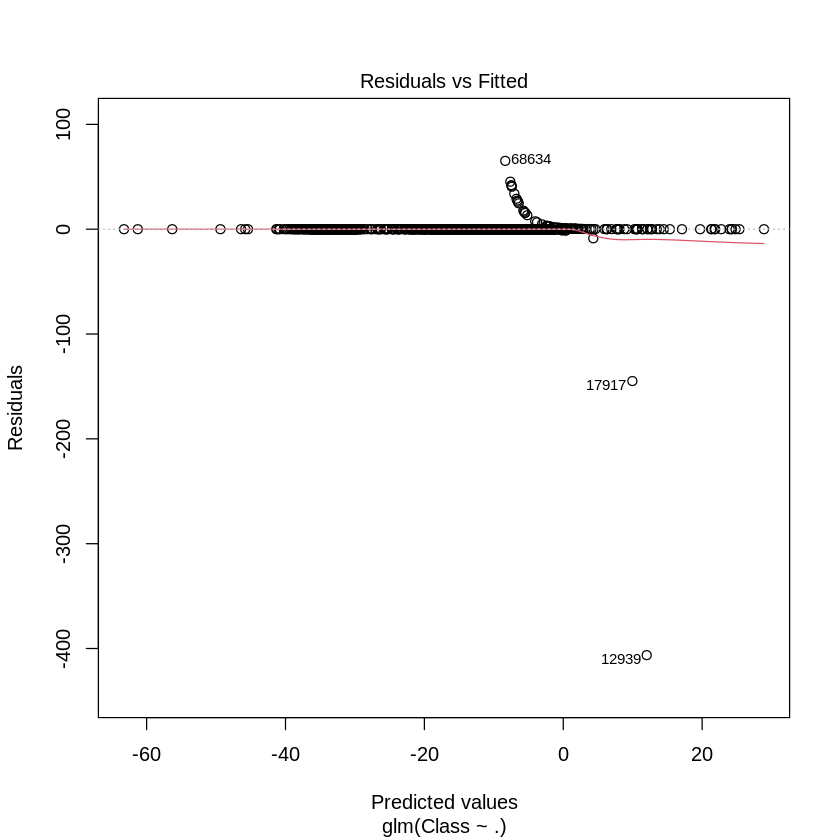

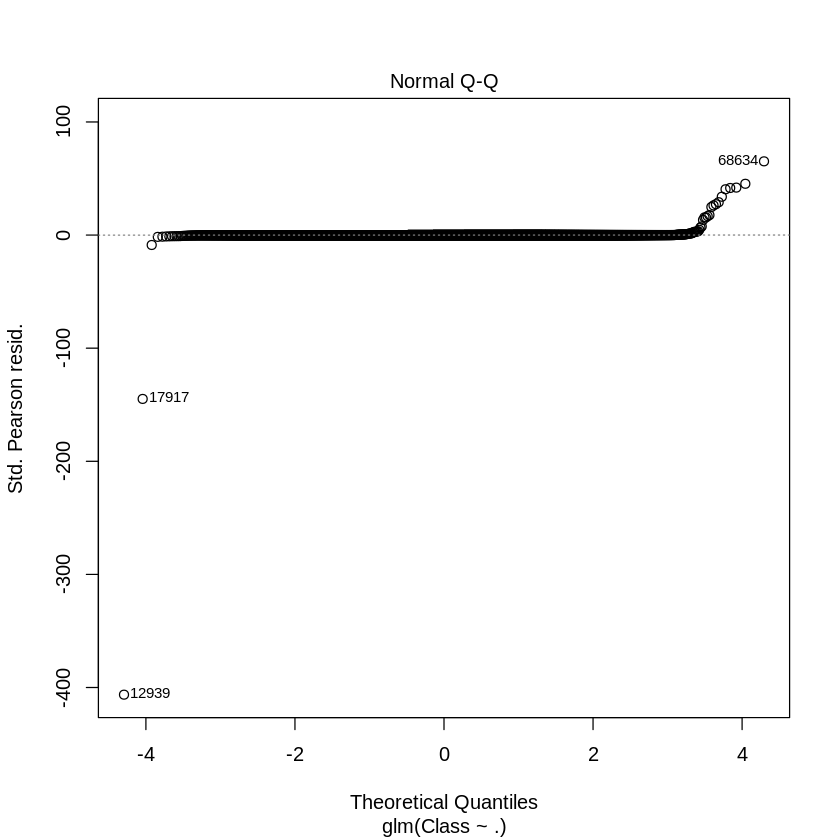

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


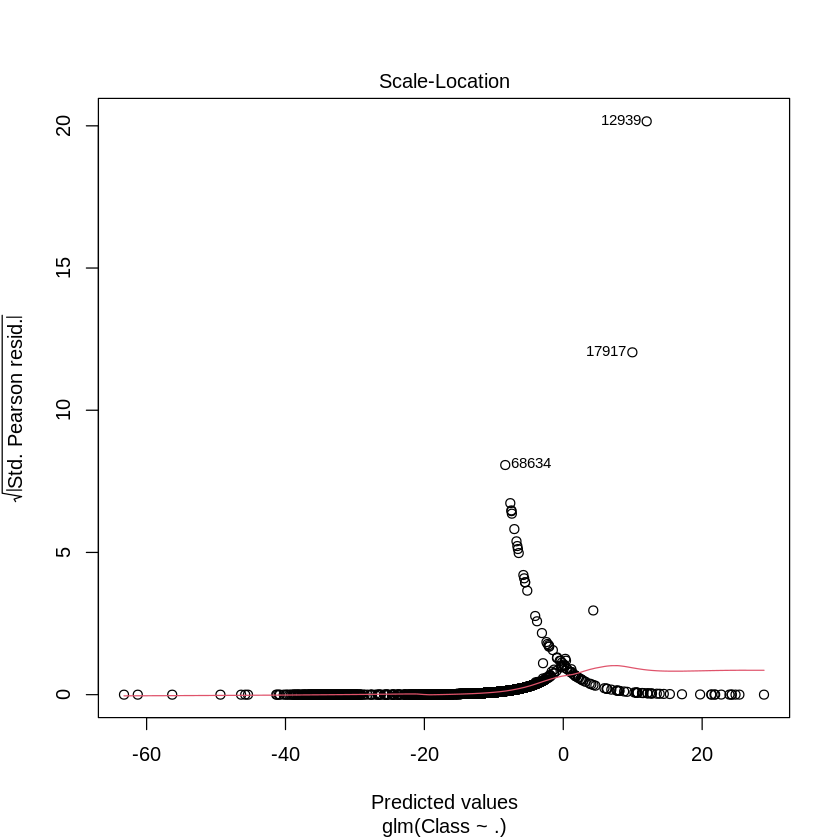

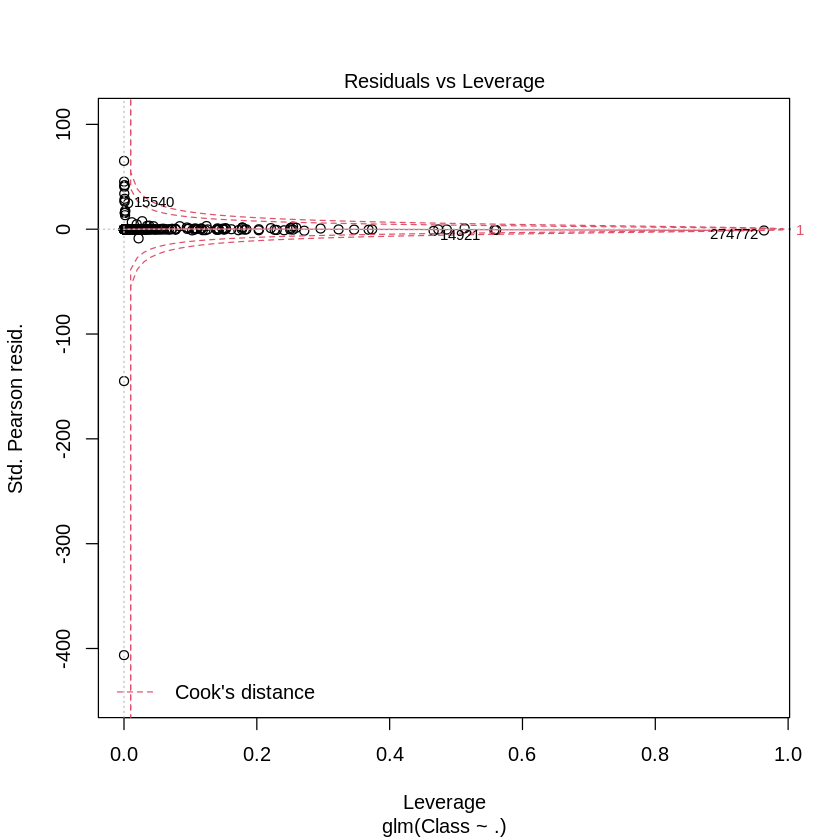

In [ ]:
#Fitting the logistic regression model on the training set

Logistic_Model=glm(Class~.,train_data,family=binomial())
summary(Logistic_Model)

plot(Logistic_Model)

In [ ]:
#Predicting outcomes for the test set

library(pROC)
lr.predict = predict(Logistic_Model,test_data, probability = TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_data$Class, predictor = lr.predict,     plot = TRUE, col = "blue")

Data: lr.predict in 56863 controls (test_data$Class 0) < 98 cases (test_data$Class 1).
Area under the curve: 0.9875


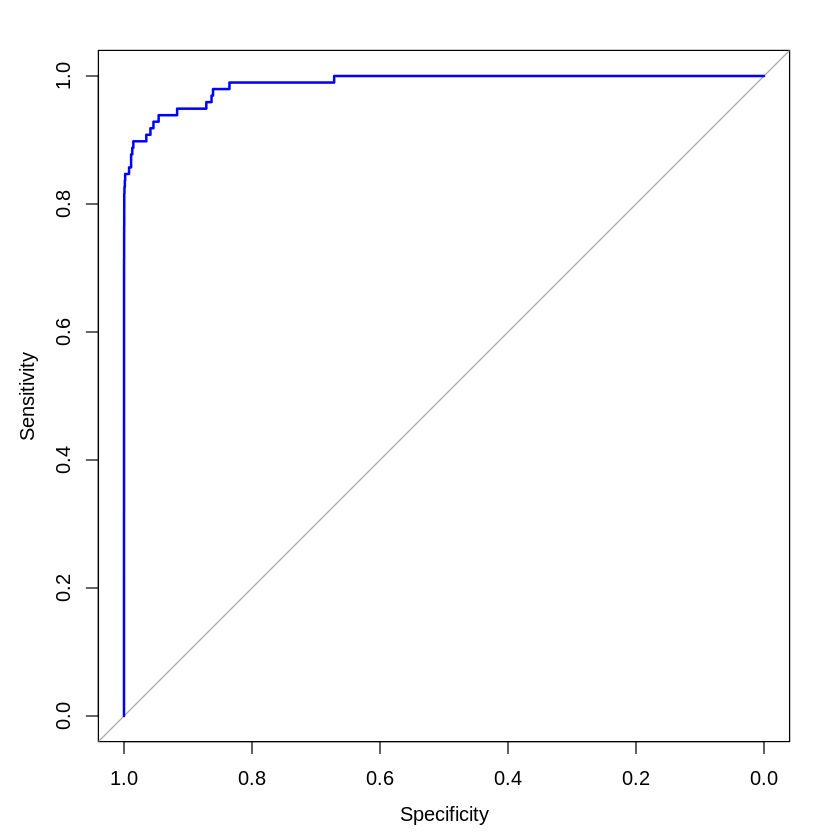

In [ ]:
#Measuring performance of the model on the test data

auc.gbm = roc(test_data$Class, lr.predict, plot = TRUE, col = "blue")
print(auc.gbm)

## Fitting a Decision Tree

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



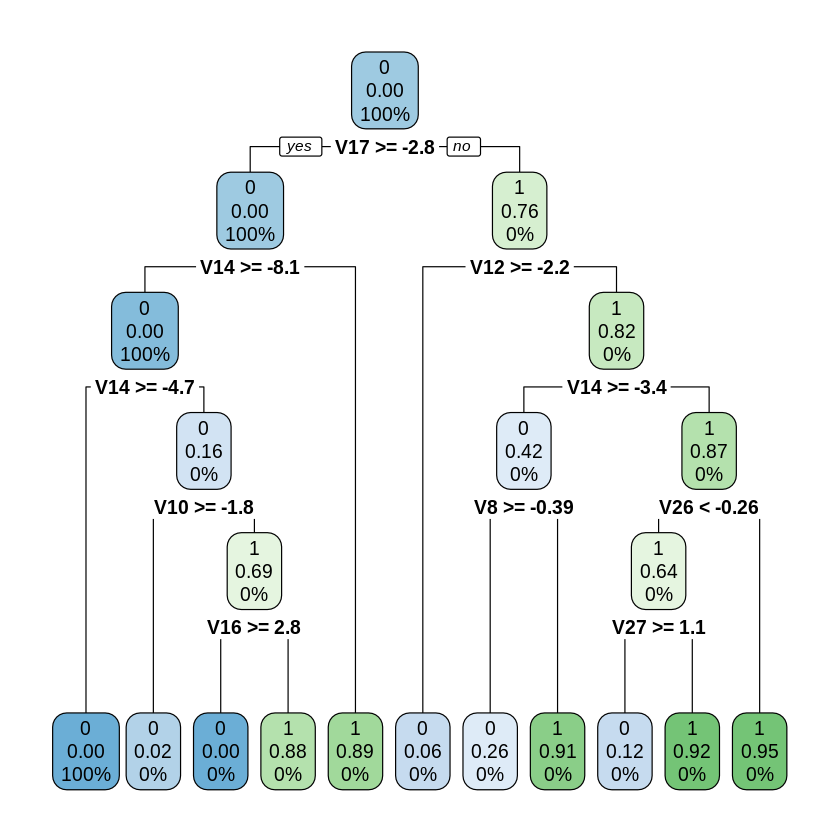

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

#Fitting the decision tree
decisionTree_model <- rpart(Class ~ . , creditcard_data, method = 'class')
predicted_val <- predict(decisionTree_model, creditcard_data, type = 'class')
probability <- predict(decisionTree_model, creditcard_data, type = 'prob')
rpart.plot(decisionTree_model)

## Fitting a Gradient Boost model

In [ ]:
install.packages("gbm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loaded gbm 2.1.8



   user  system elapsed 
361.852   0.362 363.030 

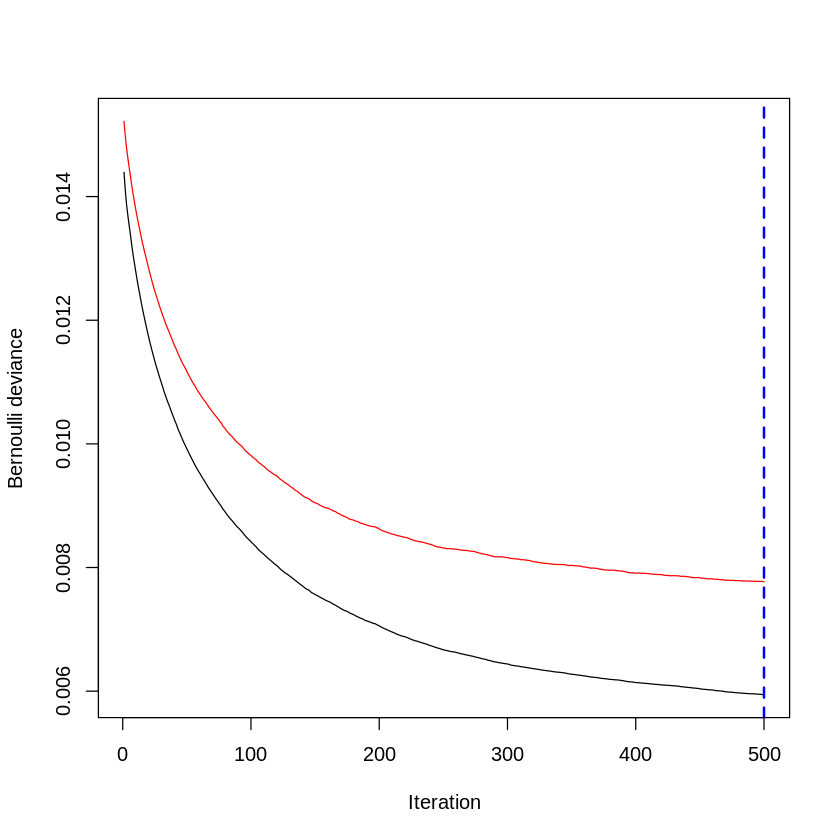

In [ ]:
library(gbm, quietly=TRUE)
# Get the time to train the GBM model
system.time(
       model_gbm <- gbm(Class ~ .
               , distribution = "bernoulli"
               , data = rbind(train_data, test_data)
               , n.trees = 500
               , interaction.depth = 3
               , n.minobsinnode = 100
               , shrinkage = 0.01
               , bag.fraction = 0.5
               , train.fraction = nrow(train_data) / (nrow(train_data) + nrow(test_data))
)
)
# Determine best iteration based on test data
gbm.iter = gbm.perf(model_gbm, method = "test")

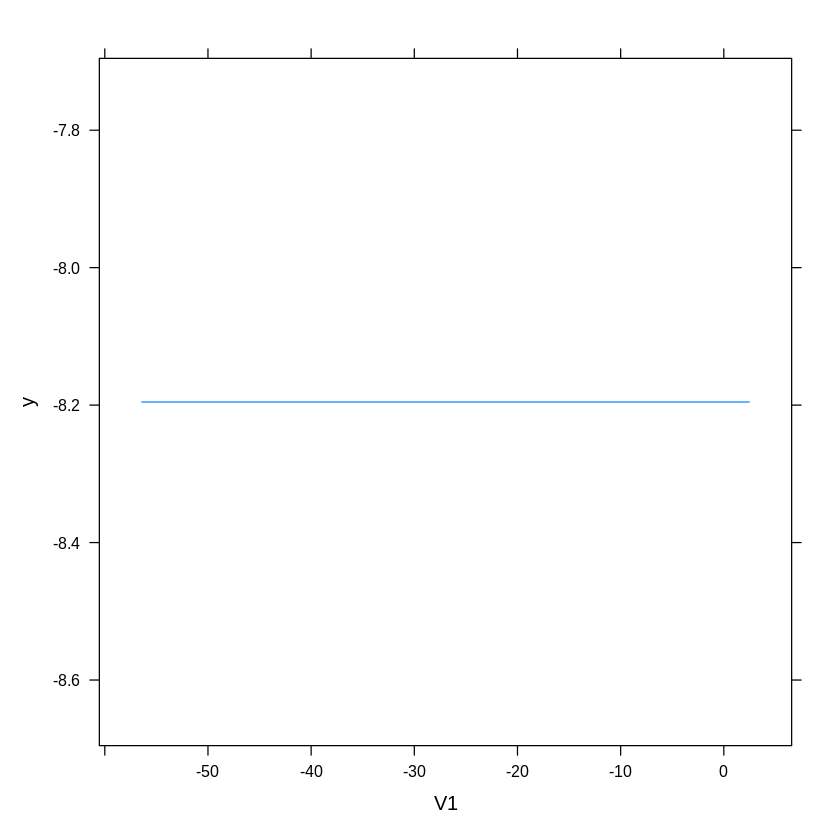

In [ ]:
model.influence = relative.influence(model_gbm, n.trees = gbm.iter, sort. = TRUE)
#Plot the gbm model
plot(model_gbm)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_data$Class, predictor = gbm_test,     plot = TRUE, col = "red")

Data: gbm_test in 56863 controls (test_data$Class 0) < 98 cases (test_data$Class 1).
Area under the curve: 0.9643


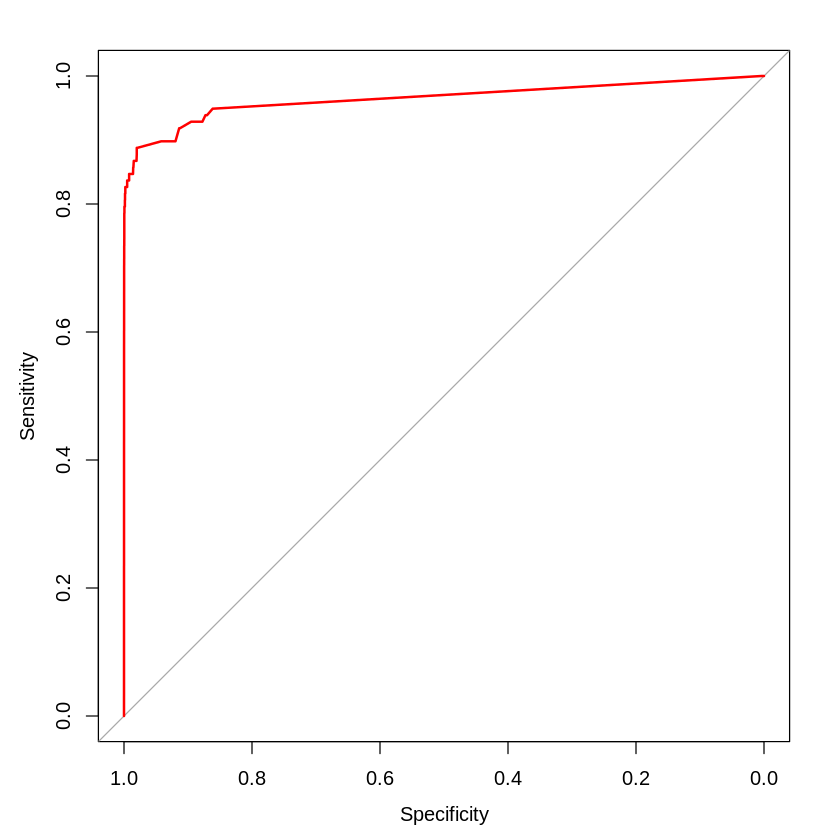

In [ ]:
# Plot and calculate AUC on test data
gbm_test = predict(model_gbm, newdata = test_data, n.trees = gbm.iter)
gbm_auc = roc(test_data$Class, gbm_test, plot = TRUE, col = "red")
print(gbm_auc)